# DBSCAN

It comes with pre-installed Python packages, so we just have to import NumPy, pandas, seaborn, matplotlib, and sklearn.

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

We are using Mall Customer Segmentation Data from Kaggle. It contains customers' age, gender, income, and spending score. We will be using these features to create various clusters. 

First, we will load the dataset using pandas `read_csv`. Then, we will select three columns (‘Age', 'Annual Income (k$)', 'Spending Score (1-100)') to create the X_train dataframe. 

In [8]:
df = pd.read_csv('C:/Users/MSI/Desktop/Machine-Learning/datasets/Mall_Customers.csv')
X_train = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

We will fit X_train on the DBSCAN algorithm with eps 12.5 and min_sample 4. After that, we will create a DBSCAN_dataset from X_train and create a ‘Cluster’ column using clustering.labels_. 

In [9]:
clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_train)
DBSCAN_dataset = X_train.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_ 

To visualize the distribution of clusters, we will use value_counts() and convert it into a dataframe. 

As you can see, we have 5 clusters and 1 outlier. The `0` cluster has the largest size with 112 rows. 

In [10]:
DBSCAN_dataset.Cluster.value_counts().to_frame()


,Cluster
0,112
2,34
3,24
-1,18
1,8
4,4


In this section, we will use the above information and visualize the scatter plot.  

There are two plots: “Annual Income vs. Spending Score” and “Annual Income vs. Age.” The clusters are defined by colors, and the outliers are defined as small black dots. 

The visualization clearly shows how each customer is part of one of the 5 clusters, and we can use this information to give high-end offers to customers with purple clusters and cheaper offers to customers with dark green clusters. 

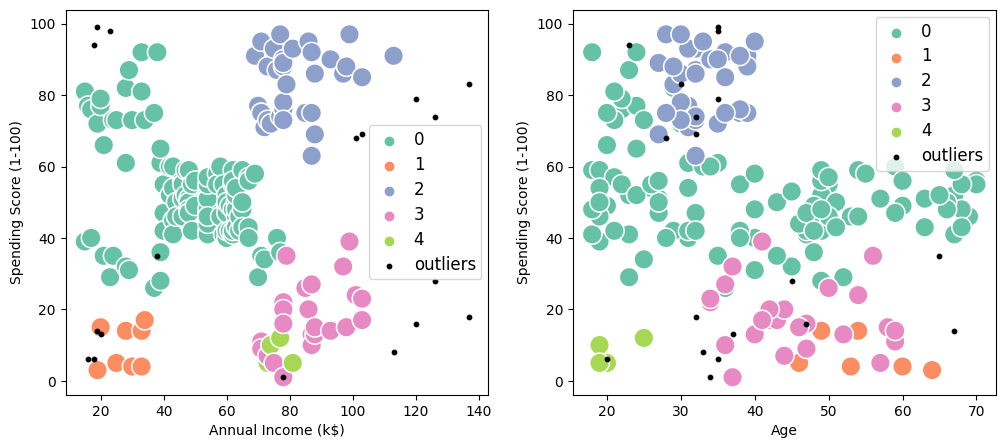

In [14]:
outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)

sns.scatterplot(x='Age', y='Spending Score (1-100)',
                data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],
                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=200)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=10, label='outliers', c="k")

axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=10, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')

plt.show()

## Conclusion

DBSCAN is one of the many algorithms that is used for customer segmentation. You can use K-means or Hierarchical clustering to get even better results. The clustering algorithms are generally used for recommendation engines, market and customer segmentation, social network Analysis, and document analysis. 

In this blog, we have learned the basics of the density-based algorithm DBCAN and how we can use it to create customer segmentation using scikit-learn. You can improve the algorithm by finding optimal eps and min_samples using silhouette score and heatmap. 